In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://github.com/benvictoria17/DataAnalytics/blob/main/dataset/Fifa19-EDA/fifa_eda.csv?raw=true")
pd.pandas.set_option('display.max_columns',None)

In [3]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [5]:
df.shape

(18207, 18)

In [6]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Skill Moves', 'Position', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'Release Clause'],
      dtype='object')

In [7]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]
for features in features_with_na:
    print(features , np.round(df[features].isnull().mean(),2),'%missing values')

Club 0.01 %missing values
Value 0.01 %missing values
International Reputation 0.0 %missing values
Skill Moves 0.0 %missing values
Contract Valid Until 0.02 %missing values


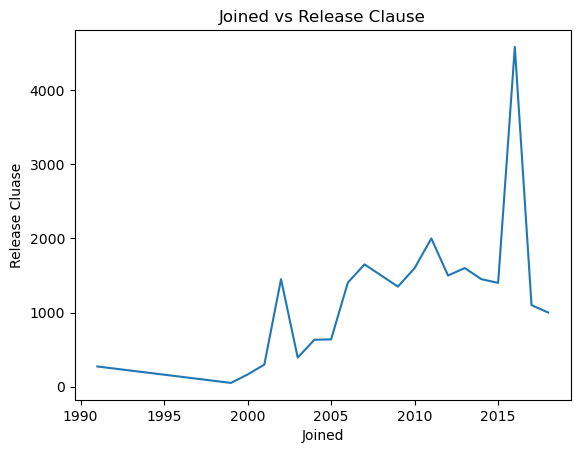

In [8]:
df.groupby('Joined')['Release Clause'].median().plot()
plt.xlabel('Joined')
plt.ylabel('Release Cluase')
plt.title('Joined vs Release Clause')
plt.show()

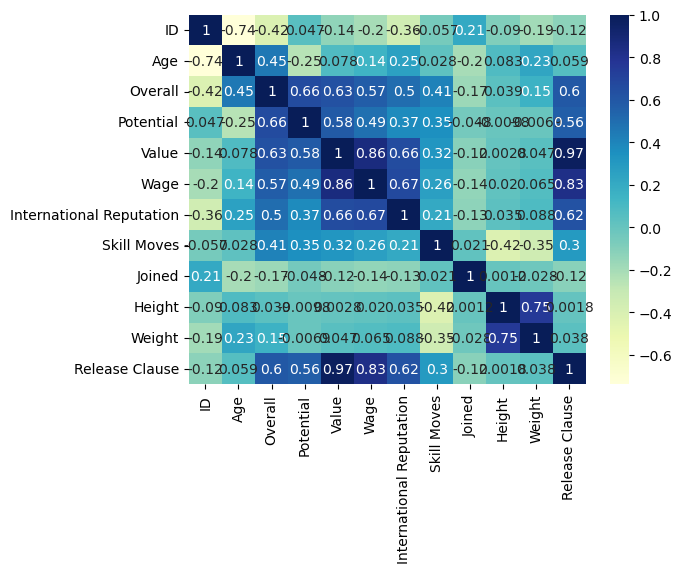

In [9]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
sb.set(rc = {'figure.figsize':(20,8)})
mp.show()

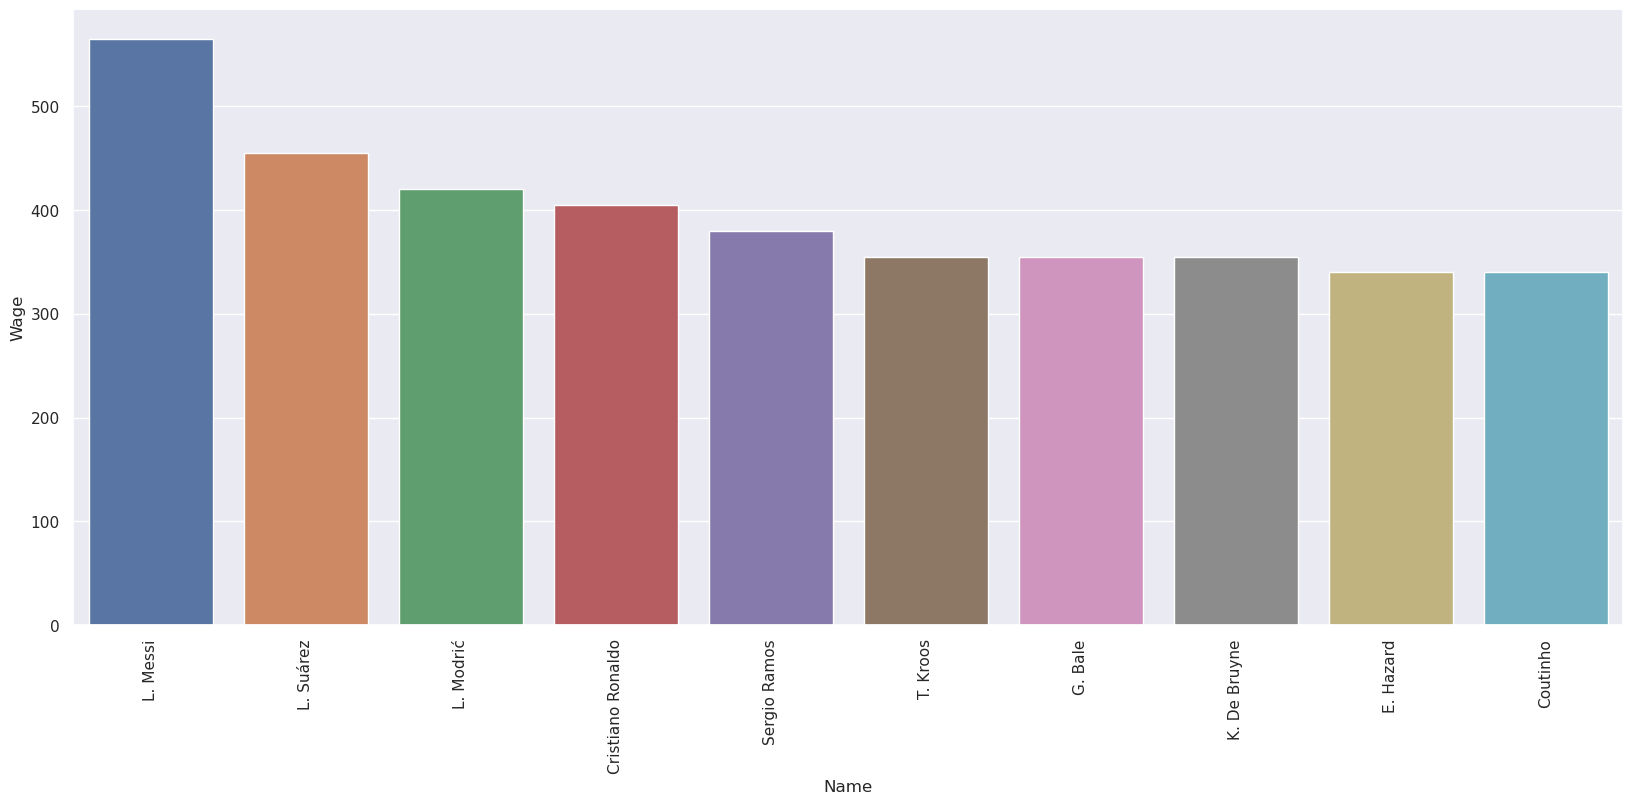

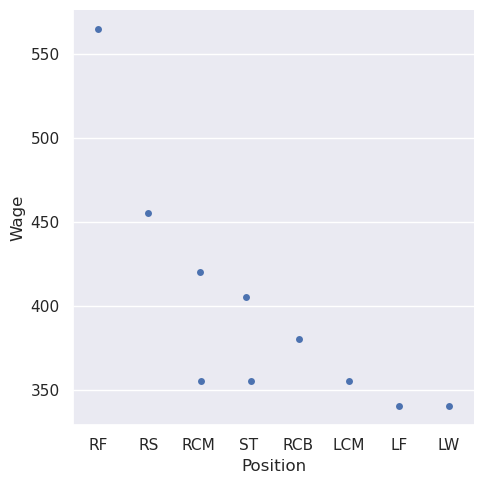

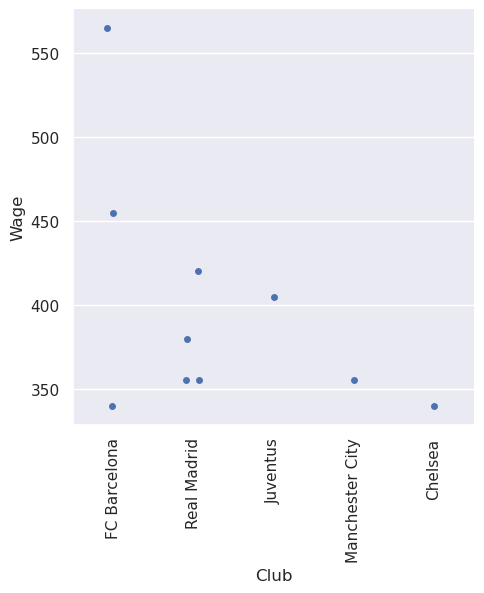

In [10]:
import matplotlib.pyplot as plt
df_max_wage = df.sort_values(by ='Wage', ascending = 0).head(10)
fig, ax = plt.subplots()
ax1 = sb.barplot(x="Name", y="Wage", data=df_max_wage, label="Club")
for item in ax1.get_xticklabels():
    item.set_rotation(90)
ax2 = sb.catplot(x="Position", y="Wage", data=df_max_wage)
ax3 = sb.catplot(x="Club", y="Wage", data=df_max_wage).set_xticklabels(rotation=90)

In [11]:
df_nationality_counts = df["Nationality"].value_counts()
df_nationality_counts

England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
                        ... 
New Caledonia              1
Fiji                       1
São Tomé & Príncipe        1
United Arab Emirates       1
Botswana                   1
Name: Nationality, Length: 164, dtype: int64

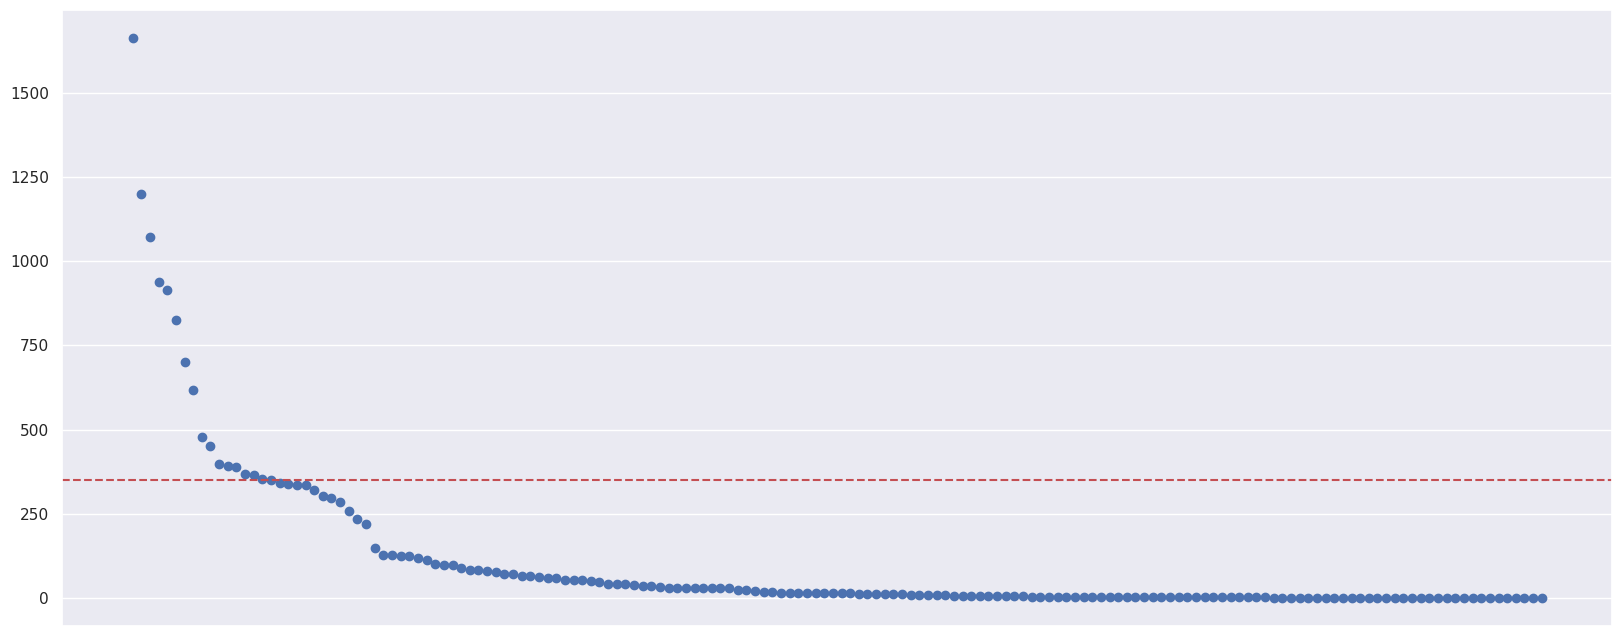

In [12]:
plt.scatter(df_nationality_counts.index,df_nationality_counts.values)
plt.xticks([])


plt.axhline(y = 350, color = 'r', linestyle = '--')

In [13]:
df_top_nationality_counts = df_nationality_counts[df_nationality_counts > 250]
df_top_nationality_counts

England                1662
Germany                1198
Spain                  1072
Argentina               937
France                  914
Brazil                  827
Italy                   702
Colombia                618
Japan                   478
Netherlands             453
Sweden                  397
China PR                392
Chile                   391
Republic of Ireland     368
Mexico                  366
United States           353
Poland                  350
Norway                  341
Saudi Arabia            340
Denmark                 336
Korea Republic          335
Portugal                322
Turkey                  303
Austria                 298
Scotland                286
Belgium                 260
Name: Nationality, dtype: int64

Text(0.5, 1.0, 'No. of Players by Nations')

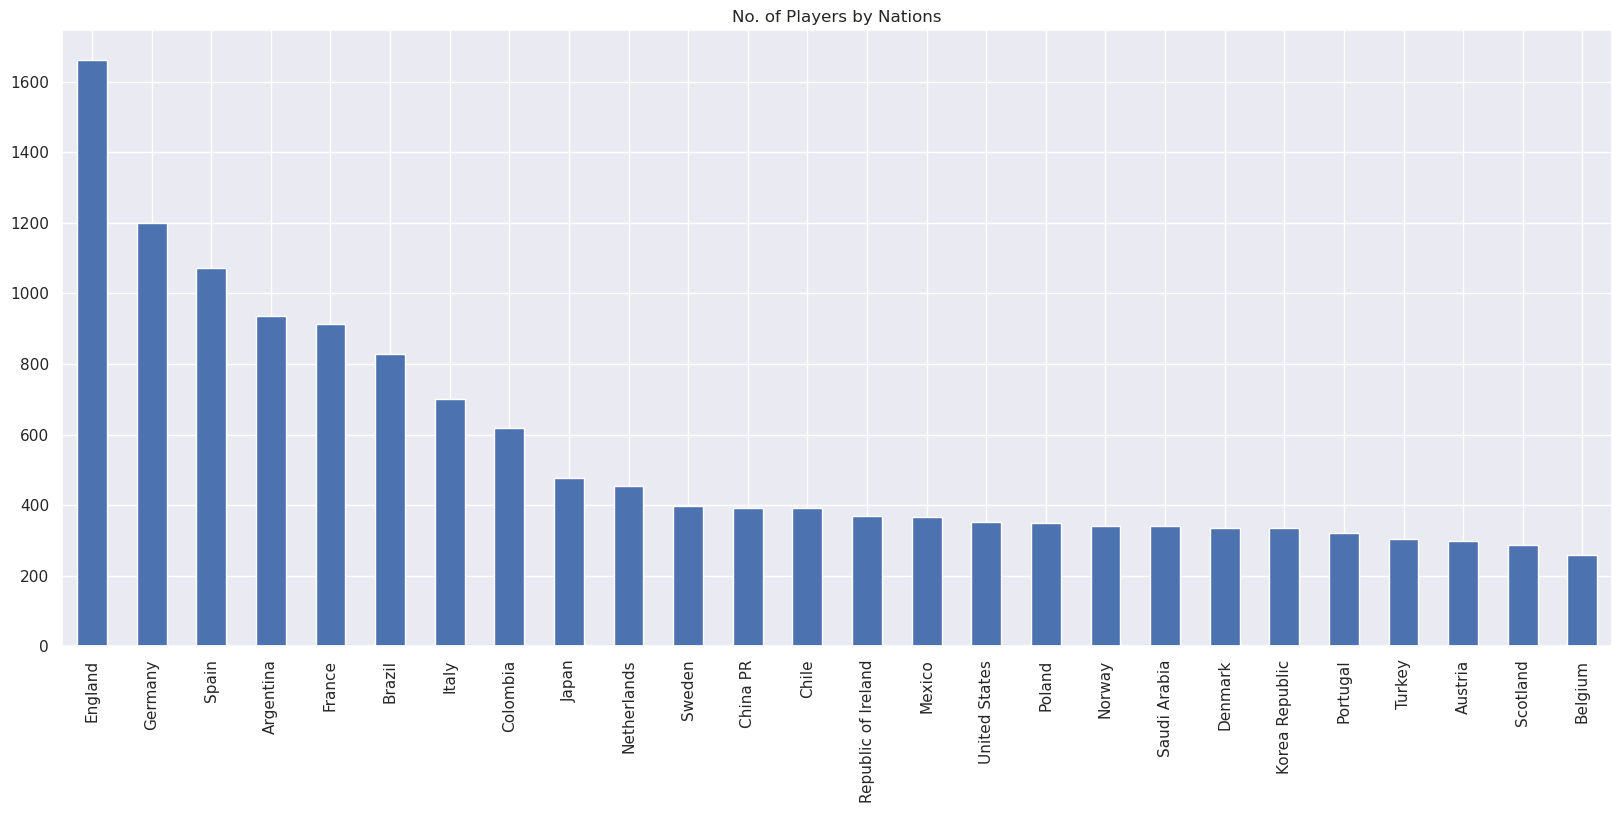

In [14]:
df_top_nationality_counts.plot.bar()
plt.title("No. of Players by Nations")